In [103]:
# %pip install pandasql
# %pip install sqlalchemy psycopg2-binary   # psycopg2 not needed for SQLite but ok to have
# %pip install tabulate
%cd searia_blog

Note: you may need to restart the kernel to use updated packages.


In [32]:
# import os
# import glob

# # Pattern for your files
# pattern = "stats_639950ae_passing_types_*.csv"

# for old_path in glob.glob(pattern):
#     # e.g. old_path = "stats_639950ae_passing_types_03c34ee9.csv"
    
#     # Decide on your new prefix (here we drop the leading “stats_639950ae_”)
#     new_filename = old_path.replace("stats_639950ae_passing_types_", "stats_639950ae_pass_types_")
    
#     # Perform the rename
#     os.rename(old_path, new_filename)
#     print(f"Renamed: {old_path} → {new_filename}")

In [63]:
import glob
import pandas as pd

flamengo_2024 = pd.read_csv("matchlogs_for_Flamengo_2024.csv")
flamengo_2025 = pd.read_csv("matchlogs_for_Flamengo_2025.csv")

#### Summary ####
# 1. Use glob to find all matching files in the current directory
files = glob.glob("stats_639950ae_summary_*.csv")

# 2. Read each CSV into a DataFrame
df_list = [pd.read_csv(f, dtype={'match_id': str}) for f in files]

# 3. Concatenate them into one big DataFrame
summary = pd.concat(df_list, ignore_index=True)

# 4. Optional: inspect
print(f"Read {len(files)} files, combined shape = {summary.shape}")

#### Defense ####
# 1. Use glob to find all matching files in the current directory
files = glob.glob("stats_639950ae_defense_*.csv")

# 2. Read each CSV into a DataFrame
df_list = [pd.read_csv(f, dtype={'match_id': str}) for f in files]

# 3. Concatenate them into one big DataFrame
defense = pd.concat(df_list, ignore_index=True)

# 4. Optional: inspect
print(f"Read {len(files)} files, combined shape = {defense.shape}")

#### Misc ####
# 1. Use glob to find all matching files in the current directory
files = glob.glob("stats_639950ae_misc_*.csv")

# 2. Read each CSV into a DataFrame
df_list = [pd.read_csv(f, dtype={'match_id': str}) for f in files]

# 3. Concatenate them into one big DataFrame
misc = pd.concat(df_list, ignore_index=True)

# 4. Optional: inspect
print(f"Read {len(files)} files, combined shape = {misc.shape}")

#### Passing ####
# 1. Use glob to find all matching files in the current directory
files = glob.glob("stats_639950ae_passing_*.csv")

# 2. Read each CSV into a DataFrame
df_list = [pd.read_csv(f, dtype={'match_id': str}) for f in files]

# 3. Concatenate them into one big DataFrame
passing = pd.concat(df_list, ignore_index=True)

# 4. Optional: inspect
print(f"Read {len(files)} files, combined shape = {passing.shape}")

#### Passing Types ####
# 1. Use glob to find all matching files in the current directory
files = glob.glob("stats_639950ae_pass_types_*.csv")

# 2. Read each CSV into a DataFrame
df_list = [pd.read_csv(f, dtype={'match_id': str}) for f in files]

# 3. Concatenate them into one big DataFrame
pass_types = pd.concat(df_list, ignore_index=True)

# 4. Optional: inspect
print(f"Read {len(files)} files, combined shape = {pass_types.shape}")

#### Possession ####
# 1. Use glob to find all matching files in the current directory
files = glob.glob("stats_639950ae_possession_*.csv")

# 2. Read each CSV into a DataFrame
df_list = [pd.read_csv(f, dtype={'match_id': str}) for f in files]

# 3. Concatenate them into one big DataFrame
possession = pd.concat(df_list, ignore_index=True)

# 4. Optional: inspect
print(f"Read {len(files)} files, combined shape = {possession.shape}")

Read 60 files, combined shape = (980, 32)
Read 60 files, combined shape = (980, 23)
Read 60 files, combined shape = (980, 23)
Read 60 files, combined shape = (980, 29)
Read 60 files, combined shape = (980, 22)
Read 60 files, combined shape = (980, 29)


In [162]:
import sqlite3
import pandas as pd
from IPython.display import HTML

# create an in-memory SQLite DB
conn = sqlite3.connect(':memory:')

flamengo_2024.to_sql('flamengo_2024', conn, index=False)#, if_exists='replace')
flamengo_2025.to_sql('flamengo_2025', conn, index=False, if_exists='replace')

summary.to_sql('summary', conn, index=False, if_exists='replace')
defense.to_sql('defense', conn, index=False, if_exists='replace')
passing.to_sql('passing', conn, index=False, if_exists='replace')
pass_types.to_sql('pass_types', conn, index=False, if_exists='replace')
misc.to_sql('misc', conn, index=False, if_exists='replace')
possession.to_sql('possession', conn, index=False, if_exists='replace')

# now use pandas’ read_sql_query
query = """
         SELECT Player, 
                SUM(Min) as min, 
                SUM(Gls)*90.00/SUM(Min) as goals_90, 
                SUM(Ast)*90.00/SUM(Min) as assist_90,
                (SUM(Ast)+SUM(Gls))*90.00/SUM(Min) as "g+a_90",
                --SUM(PK)*90.00/SUM(Min) as pk_90,
                --SUM(PKatt)*90.00/SUM(Min) as pkatt_90,
                --SUM(Sh)*90.00/SUM(Min) as shots_90,
                --SUM(SoT)*90.00/SUM(Min) as shots_target_90,
                --SUM(Touches)*90.00/SUM(Min) as touches_90,
                SUM(xG)*90.00/SUM(Min) as xg_90,
                --SUM(npxG)*90.00/SUM(Min) as npxG_90,
                SUM(xAG)*90.00/SUM(Min) as xa_90,
                --SUM(SCA)*90.00/SUM(Min) as shots_ca_90,
                --SUM(GCA)*90.00/SUM(Min) as goals_ca_90,
                SUM(Cmp)*90.00/SUM(Min) as passes_cmp_90
                --SUM(Att)*90.00/SUM(Min) as passes_att_90,
                --SUM(PrgP)*90.00/SUM(Min) as prog_pass_cmp_90,
                --SUM(Carries)*90.00/SUM(Min) as carries_90,
                --SUM(PrgC)*90.00/SUM(Min) as prog_carries_90,
                --SUM("Att.1")*90.00/SUM(Min) as takeon_att_90,
                --SUM(Succ)*90.00/SUM(Min) as takeon_succ_90
         FROM summary 
         WHERE Player = 'Giorgian De Arrascaeta'
         AND match_id IN (SELECT match_id FROM flamengo_2025 WHERE Comp = 'Série A')
         GROUP BY 1
        """



result = pd.read_sql_query(query, conn)
HTML(result.to_html(notebook=True))

# print("2025")
# print(result)
# print("\n")



,Player,min,goals_90,assist_90,g+a_90,xg_90,xa_90,passes_cmp_90
0,Giorgian De Arrascaeta,539,1.168831,0.500928,1.669759,0.350649,0.267161,42.077922


In [161]:
import sqlite3
import pandas as pd
from IPython.display import HTML

# create an in-memory SQLite DB
conn = sqlite3.connect(':memory:')

flamengo_2024.to_sql('flamengo_2024', conn, index=False)#, if_exists='replace')
flamengo_2025.to_sql('flamengo_2025', conn, index=False, if_exists='replace')

summary.to_sql('summary', conn, index=False, if_exists='replace')
defense.to_sql('defense', conn, index=False, if_exists='replace')
passing.to_sql('passing', conn, index=False, if_exists='replace')
pass_types.to_sql('pass_types', conn, index=False, if_exists='replace')
misc.to_sql('misc', conn, index=False, if_exists='replace')
possession.to_sql('possession', conn, index=False, if_exists='replace')

query2 = """
         SELECT Player, 
                SUM(Min) as min, 
                SUM(Gls)*90.00/SUM(Min) as goals_90, 
                SUM(Ast)*90.00/SUM(Min) as assist_90,
                (SUM(Ast)+SUM(Gls))*90.00/SUM(Min) as "g+a_90",
                --SUM(PK)*90.00/SUM(Min) as pk_90,
                --SUM(PKatt)*90.00/SUM(Min) as pkatt_90,
                --SUM(Sh)*90.00/SUM(Min) as shots_90,
                --SUM(SoT)*90.00/SUM(Min) as shots_target_90,
                --SUM(Touches)*90.00/SUM(Min) as touches_90,
                SUM(xG)*90.00/SUM(Min) as xg_90,
                --SUM(npxG)*90.00/SUM(Min) as npxG_90,
                SUM(xAG)*90.00/SUM(Min) as xa_90,
                --SUM(SCA)*90.00/SUM(Min) as shots_ca_90,
                --SUM(GCA)*90.00/SUM(Min) as goals_ca_90,
                SUM(Cmp)*90.00/SUM(Min) as passes_cmp_90
                --SUM(Att)*90.00/SUM(Min) as passes_att_90,
                --SUM(PrgP)*90.00/SUM(Min) as prog_pass_cmp_90,
                --SUM(Carries)*90.00/SUM(Min) as carries_90,
                --SUM(PrgC)*90.00/SUM(Min) as prog_carries_90,
                --SUM("Att.1")*90.00/SUM(Min) as takeon_att_90,
                --SUM(Succ)*90.00/SUM(Min) as takeon_succ_90
         FROM summary 
         WHERE Player = 'Giorgian De Arrascaeta'
         AND match_id IN (SELECT match_id FROM flamengo_2024 WHERE Comp = 'Série A')
         GROUP BY 1
         """

result2 = pd.read_sql_query(query2, conn)
HTML(result2.to_html(notebook=True))

# print("2024")
# print(result2)

# conn.close()

/Users/damatta/opt/anaconda3/lib/python3.9/site-packages/pandas/core/generic.py:2872: UserWarning: The spaces in these column names will not be changed. In pandas versions < 0.14, spaces were converted to underscores.
  sql.to_sql(


,Player,min,goals_90,assist_90,g+a_90,xg_90,xa_90,passes_cmp_90
0,Giorgian De Arrascaeta,1007,0.446872,0.446872,0.893744,0.196624,0.232373,44.329692


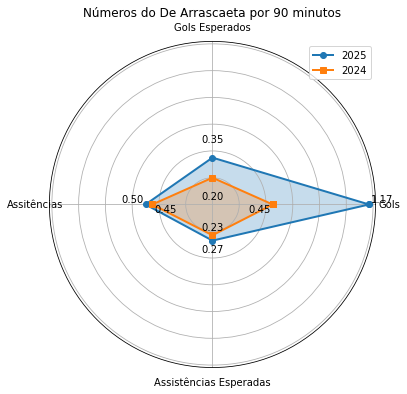

In [181]:
# import pandas as pd
# import matplotlib.pyplot as plt
# import numpy as np

# result = result[['goals_90', 'xg_90', 'assist_90', 'xa_90']]

# result2 = result2[['goals_90', 'xg_90', 'assist_90', 'xa_90']]

# ######
# categories = ['Gols', 'Gols Esperados', 'Assitências', 'Assistências Esperadas']
# values = result.loc[0].round(2).tolist()

# # Compute angles for each category
# angles = np.linspace(0, 2 * np.pi, len(categories), endpoint=False).tolist()
# angles += angles[:1]

# # Close the loop
# # values_loop = values + values[:1]
# # angles_loop = angles + angles[:1]

# vals1 = result.loc[0].round(2).tolist()
# vals1 += vals1[:1]
# vals2 = result2.loc[0].round(2).tolist()
# vals2 += vals2[:1]

# fig, ax = plt.subplots(figsize=(6,6), subplot_kw=dict(polar=True))

# # series 1
# ax.plot(angles, vals1, marker='o', linewidth=2, label='2025')
# ax.fill(angles, vals1, alpha=0.25)

# # series 2
# ax.plot(angles, vals2, marker='s', linewidth=2, label='2024')
# ax.fill(angles, vals2, alpha=0.25)

# # hide radial ticks
# ax.set_yticklabels([])

# # category labels
# ax.set_xticks(angles[:-1])
# ax.set_xticklabels(categories)

# # ax.set_ylim(0, 1.5)

# # annotate values
# for angle, v1, v2 in zip(angles[:-1], result.loc[0].round(2), result2.loc[0].round(2)):
#     ax.text(angle, v1+0.1, f"{v1:.2f}", ha='center', va='bottom')
#     ax.text(angle, v2-0.1, f"{v2:.2f}", ha='center', va='top')

# # legend & title
# ax.legend(loc='upper right')
# ax.set_title('Números do De Arrascaeta por 90 minutos')

# plt.show()




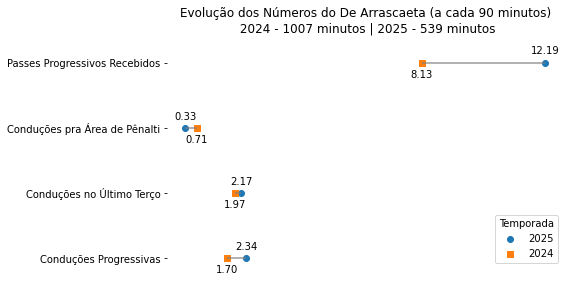

In [324]:
import pandas as pd
import matplotlib.pyplot as plt

result = result[['prog_conduc','conduc_third','conduc_penalti', 'pass_prog_rec']]
result2 = result2[['prog_conduc','conduc_third','conduc_penalti', 'pass_prog_rec']]

# result = result[['goals_90', 'xg_90', 'assist_90', 'xa_90']]

# result2 = result2[['goals_90', 'xg_90', 'assist_90', 'xa_90']]

# # Sample data: replace with your actual DataFrame values
# metrics = ['Gols', 'Gols Esperados', 'Assitências', 'Assistências Esperadas']
# year1 = result.loc[0].round(2).tolist()
# year2 = result2.loc[0].round(2).tolist()

# import pandas as pd
# import matplotlib.pyplot as plt

# Sample data: replace with your actual DataFrame values
metrics = ['Conduções Progressivas','Conduções no Último Terço','Conduções pra Área de Pênalti', 'Passes Progressivos Recebidos']
year1 = result.loc[0].round(2).tolist()
year2 = result2.loc[0].round(2).tolist()

df = pd.DataFrame({'Metric': metrics, 'Year1': year1, 'Year2': year2})

# Create figure and axis
fig, ax = plt.subplots(figsize=(8, 4))

# Y positions for each metric
y_pos = range(len(df))

# Draw connector lines and scatter points
for y, x1, x2 in zip(y_pos, df['Year1'], df['Year2']):
    ax.hlines(y, x1, x2, linewidth=2, color='gray', alpha=0.6)
    
p1 = ax.scatter(df['Year1'], y_pos, marker='o', label='2025')
p2 = ax.scatter(df['Year2'], y_pos, marker='s', label='2024')

# Annotate values and deltas
for y, x1, x2 in zip(y_pos, df['Year1'], df['Year2']):
    ax.text(x1, y + 0.1, f"{x1:.2f}", ha='center', va='bottom')
    ax.text(x2, y - 0.1, f"{x2:.2f}", ha='center', va='top')
    mid, delta = (x1 + x2) / 2, x2 - x1
#     ax.text(mid, y, f"{delta:+.2f}", ha='center', va='center')

# Grid only on x-axis
ax.xaxis.grid(True, linestyle='--', alpha=0.5)

# Remove the outer box (spines)
for spine in ax.spines.values():
    spine.set_visible(False)

# Add a small margin around the data
ax.margins(x=0.05)
# ax.set_xlim(0.2, 13)
ax.set_xticks([])
# Set labels, ticks, legend, and title
ax.set_yticks(y_pos)
ax.set_yticklabels(df['Metric'])
ax.set_xlabel('')
ax.set_title('Evolução dos Números do De Arrascaeta (a cada 90 minutos)\n 2024 - 1007 minutos | 2025 - 539 minutos\n')
ax.legend(title='Temporada', loc='lower right')

# fig.text(
#     0.05,        # x: 1% from left
#     -0.01,        # y: 1% from bottom
#     'Nota: Somente jogos do Brasileirao Seria A foram considerados (até rodada 8 em 2025)', 
#     ha='left', 
#     va='bottom', 
#     fontsize=10, 
#     color='gray'
# )



plt.tight_layout(pad=1.0)
plt.show()



In [317]:
import sqlite3
import pandas as pd
from IPython.display import HTML

# create an in-memory SQLite DB
conn = sqlite3.connect(':memory:')

flamengo_2024.to_sql('flamengo_2024', conn, index=False)#, if_exists='replace')
flamengo_2025.to_sql('flamengo_2025', conn, index=False, if_exists='replace')

summary.to_sql('summary', conn, index=False, if_exists='replace')
defense.to_sql('defense', conn, index=False, if_exists='replace')
passing.to_sql('passing', conn, index=False, if_exists='replace')
pass_types.to_sql('pass_types', conn, index=False, if_exists='replace')
misc.to_sql('misc', conn, index=False, if_exists='replace')
possession.to_sql('possession', conn, index=False, if_exists='replace')

query2 = """
         SELECT Player, 
                --SUM(Min) as min, 
                SUM("PrgC")*90.00/539 as prog_conduc,
                SUM("1/3")*90.00/539 as "conduc_third",
                SUM("CPA")*90.00/539 as conduc_penalti,
                SUM("PrgR")*90.00/539 as pass_prog_rec 
               
         FROM possession 
         WHERE Player = 'Giorgian De Arrascaeta'
         AND match_id IN (SELECT match_id FROM flamengo_2025 WHERE Comp = 'Série A')
         GROUP BY 1
         """

result = pd.read_sql_query(query2, conn)
HTML(result.to_html(notebook=True))


# print("2024")
# print(result2)

# conn.close()

,Player,prog_conduc,conduc_third,conduc_penalti,pass_prog_rec
0,Giorgian De Arrascaeta,2.337662,2.170686,0.333952,12.189239


In [318]:
import sqlite3
import pandas as pd
from IPython.display import HTML

# create an in-memory SQLite DB
conn = sqlite3.connect(':memory:')

flamengo_2024.to_sql('flamengo_2024', conn, index=False)#, if_exists='replace')
flamengo_2025.to_sql('flamengo_2025', conn, index=False, if_exists='replace')

summary.to_sql('summary', conn, index=False, if_exists='replace')
defense.to_sql('defense', conn, index=False, if_exists='replace')
passing.to_sql('passing', conn, index=False, if_exists='replace')
pass_types.to_sql('pass_types', conn, index=False, if_exists='replace')
misc.to_sql('misc', conn, index=False, if_exists='replace')
possession.to_sql('possession', conn, index=False, if_exists='replace')

query2 = """
         SELECT Player, 
                --SUM(Min) as min, 
                SUM("PrgC")*90.00/1007 as prog_conduc,
                SUM("1/3")*90.00/1007 as "conduc_third",
                SUM("CPA")*90.00/1007 as conduc_penalti,
                SUM("PrgR")*90.00/1007 as pass_prog_rec 
                --SUM("Att Pen")*90.00/1007 as att_pen
               
         FROM possession 
         WHERE Player = 'Giorgian De Arrascaeta'
         AND match_id IN (SELECT match_id FROM flamengo_2024 WHERE Comp = 'Série A')
         GROUP BY 1
         """

result2 = pd.read_sql_query(query2, conn)
HTML(result2.to_html(notebook=True))

,Player,prog_conduc,conduc_third,conduc_penalti,pass_prog_rec
0,Giorgian De Arrascaeta,1.698113,1.966236,0.714995,8.133069


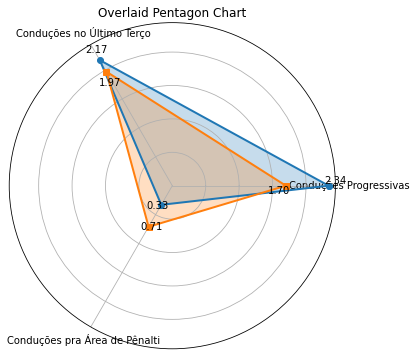

Text(0.5, 1.0, '')

In [312]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# example data
df1 = result[['prog_conduc','conduc_third','conduc_penalti']]
df2 = result2[['prog_conduc','conduc_third','conduc_penalti']]

categories = ['Conduções Progressivas','Conduções no Último Terço','Conduções pra Área de Pênalti']
angles = np.linspace(0, 2*np.pi, len(categories), endpoint=False).tolist()
angles += angles[:1]  # close loop

# extract & close each series
vals1 = df1.loc[0].round(2).tolist()
vals1 += vals1[:1]
vals2 = df2.loc[0].round(2).tolist()
vals2 += vals2[:1]

fig, ax = plt.subplots(figsize=(6,6), subplot_kw=dict(polar=True))

# series 1
ax.plot(angles, vals1, marker='o', linewidth=2, label='2025')
ax.fill(angles, vals1, alpha=0.25)

# series 2
ax.plot(angles, vals2, marker='s', linewidth=2, label='2024')
ax.fill(angles, vals2, alpha=0.25)

# hide radial ticks
ax.set_yticklabels([])

# category labels
ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories)

# annotate values
for angle, v1, v2 in zip(angles[:-1], df1.loc[0].round(2), df2.loc[0].round(2)):
# for angle, v1 in zip(angles[:-1], df1.loc[0].round(2)):#, df2.loc[0].round(2)):
    ax.text(angle, v1+0.1, f"{v1:.2f}", ha='center', va='bottom')
    ax.text(angle, v2-0.1, f"{v2:.2f}", ha='center', va='top')

# legend & title
# ax.legend(loc='upper right')
ax.set_title('Overlaid Pentagon Chart')

plt.show()


# # 1) Make category labels bold and larger:
# ax.set_xticks(angles[:-1])
# ax.set_xticklabels(
#     categories,
#     fontsize=14,        # size in points
#     fontweight='bold'   # or weight='bold'
# )

# 2) Make your data‐point annotations bold/large, too:
for angle, v1, v2 in zip(angles[:-1], df1.loc[0].round(2), df2.loc[0].round(2)):
    ax.text(
        angle, v1 + 0.1, f"{v1:.2f}",
        ha='center', va='top',
        fontsize=12,
        fontweight='bold'
    )


# (Optional) Also bump up the title:
ax.set_title(
    '',
    fontsize=16,
    fontweight='bold'
)


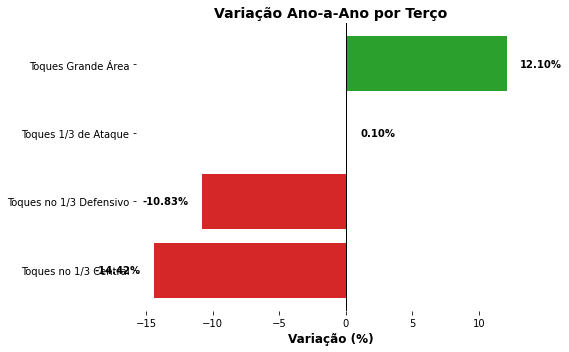

ValueError: margin must be greater than -0.5

In [294]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# --- your actual dataframes ---
df1 = result[['def_third','mid_third','att_third','att_pen']]
df2 = result2[['def_third','mid_third','att_third','att_pen']]

# compute % change
df_pct = ((df1 - df2) / df2) * 100

# take the first row and round
row = df_pct.iloc[0].round(2)

# custom labels
categories = [
    'Toques no 1/3 Defensivo',
    'Toques no 1/3 Central',
    'Toques 1/3 de Ataque',
    'Toques Grande Área'
]

# build and sort a Series
s = pd.Series(data=row.values, index=categories).sort_values()

# plotting
fig, ax = plt.subplots(figsize=(8, 5))

# remove the outside box:
for spine in ax.spines.values():
    spine.set_visible(False)

# diverging bars
colors = np.where(s.values >= 0, 'tab:green', 'tab:red')
ax.barh(s.index, s.values, color=colors)
ax.axvline(0, color='black', linewidth=1)

# annotate
for cat, val in s.items():
    ax.text(
        val + (1 if val >= 0 else -1),
        cat,
        f"{val:.2f}%",
        ha='left' if val >= 0 else 'right',
        va='center',
        fontweight='bold'
    )

ax.set_xlabel('Variação (%)', fontsize=12, fontweight='bold')
ax.set_title('Variação Ano-a-Ano por Terço', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

ax.margins(y=-5, x=5)

plt.tight_layout()
plt.show()
